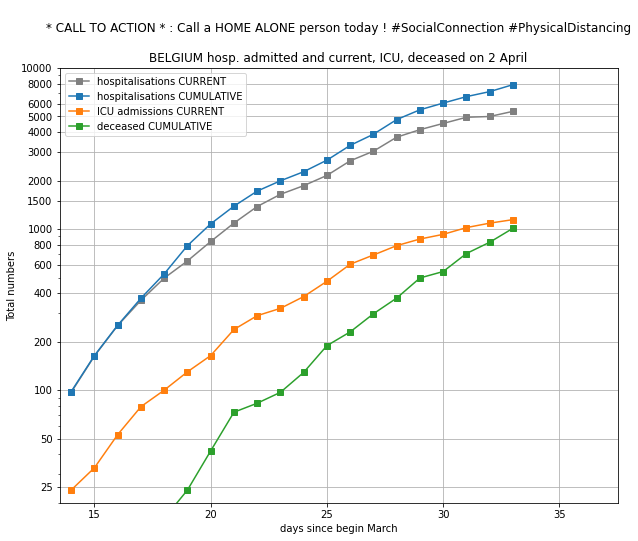

In [0]:
# BELGIUM 2 April 2020 (day 32)
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836, 1063, 1359, 1527, 1696, 2132, 2495]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042, 3717, 4138, 4524, 4940, 4995, 5376]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878, 4780, 5497, 6051, 6636, 7127, 7871] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690,  789,  867,  927, 1021, 1088, 1144]


from operator import add
deceased_OLD =    [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289,  353,  431,  513,  705] 
redistribute =    [  2,   0,   0,   2,   2,   3,    5,    6,    8,    9,    7,   11,   10,    9,   20,   66,   32,    0]
# deceased = list(map(add, deceased_OLD, redistribute))
deceased =        [  6,   4,   5,   12, 16,  24,   42,   73,   83,   97,  129,  189,  230,  298,  373,  497,  545,  705,  828, 1011]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
# last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
# last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
# print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
# print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
# print(f"Days of April:               {[(x[0] - 31) for x in trendline_dates]}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
# print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
# print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
# LIN
# plt.ylim((0,8000))
# values = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

#LOG
plt.yscale("log")
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]

plt.yticks(values, ['%d' % val for val in values])

# plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
# plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations CUMULATIVE")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions CURRENT")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased CUMULATIVE")


plt.xlabel("days since begin March")
plt.ylabel("Total numbers")
plt.title(f"\n* CALL TO ACTION * : Call a HOME ALONE person today ! #SocialConnection #PhysicalDistancing\n\n{country} hosp. admitted and current, ICU, deceased on {(current_day - 31)} April")
plt.legend()
plt.grid()
plt.show()

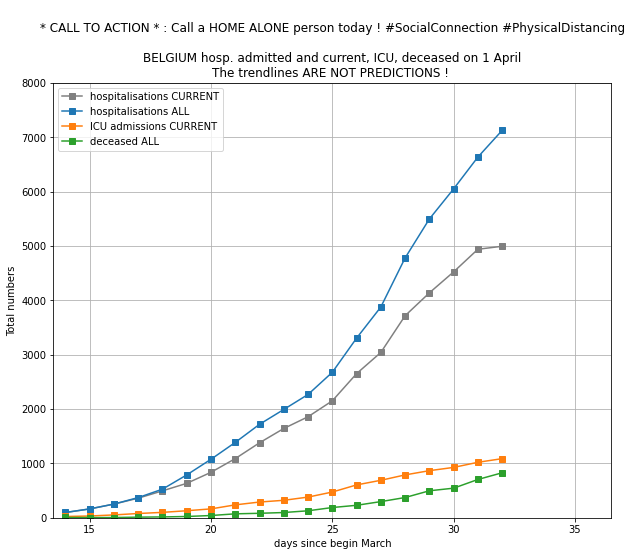

In [0]:
# BELGIUM 1 April 2020 (day 32)
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836, 1063, 1359, 1527, 1696, 2132]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042, 3717, 4138, 4524, 4940, 4995]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878, 4780, 5497, 6051, 6636, 7127] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690,  789,  867,  927, 1021, 1088]


from operator import add
deceased_OLD =    [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289,  353,  431,  513,  705] 
redistribute =    [  2,   0,   0,   2,   2,   3,    5,    6,    8,    9,    7,   11,   10,    9,   20,   66,   32,    0]
# deceased = list(map(add, deceased_OLD, redistribute))
deceased =        [  6,   4,   5,   12, 16,  24,   42,   73,   83,   97,  129,  189,  230,  298,  373,  497,  545,  705,  828]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
# print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
# print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
# print(f"Days of April:               {[(x[0] - 31) for x in trendline_dates]}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
# print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
# print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
# plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((0,8000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
values = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.yticks(values, ['%d' % val for val in values])

# plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
# plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ALL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions CURRENT")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased ALL")


plt.xlabel("days since begin March")
plt.ylabel("Total numbers")
plt.title(f"\n* CALL TO ACTION * : Call a HOME ALONE person today ! #SocialConnection #PhysicalDistancing\n\n{country} hosp. admitted and current, ICU, deceased on {(current_day - 31)} April\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 7.36
ICU admissions   doubling days = 8.48
Days of March:               [[32], [33], [34], [35]]
Trendline LINEAR numbers:    [8258, 9623, 11213, 13066]
Trendline QUADRATIC numbers: [7107, 7400, 7515, 7443]


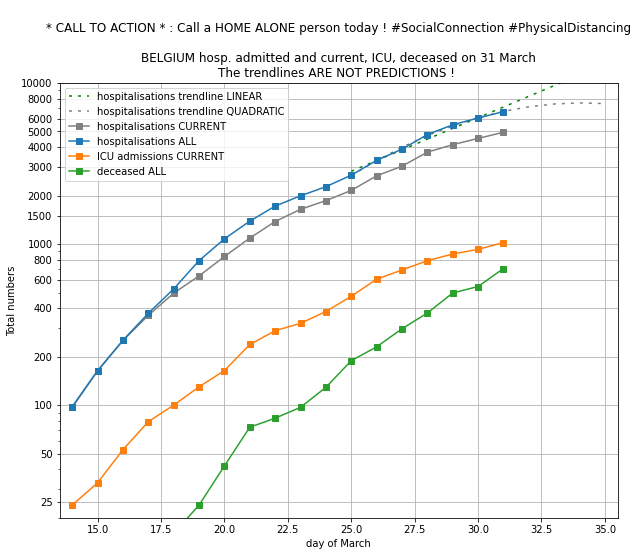

In [0]:
# BELGIUM 31 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836, 1063, 1359, 1527, 1696]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042, 3717, 4138, 4524, 4940]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878, 4780, 5497, 6051, 6636] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690,  789,  867,  927, 1021]


from operator import add
deceased_OLD =    [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289,  353,  431,  513,  705] 
redistribute =    [  2,   0,   0,   2,   2,   3,    5,    6,    8,    9,    7,   11,   10,    9,   20,   66,   32,    0]
# deceased = list(map(add, deceased_OLD, redistribute))
deceased =        [  6,   4,   5,   12, 16,  24,   42,   73,   83,   97,  129,  189,  230,  298,  373,  497,  545,  705]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ALL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions CURRENT")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased ALL")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"\n* CALL TO ACTION * : Call a HOME ALONE person today ! #SocialConnection #PhysicalDistancing\n\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 5.88
ICU admissions   doubling days = 8.60
Days of March:               [[31], [32], [33], [34]]
Trendline LINEAR numbers:    [7575, 8976, 10635, 12602]
Trendline QUADRATIC numbers: [6950, 7719, 8452, 9123]


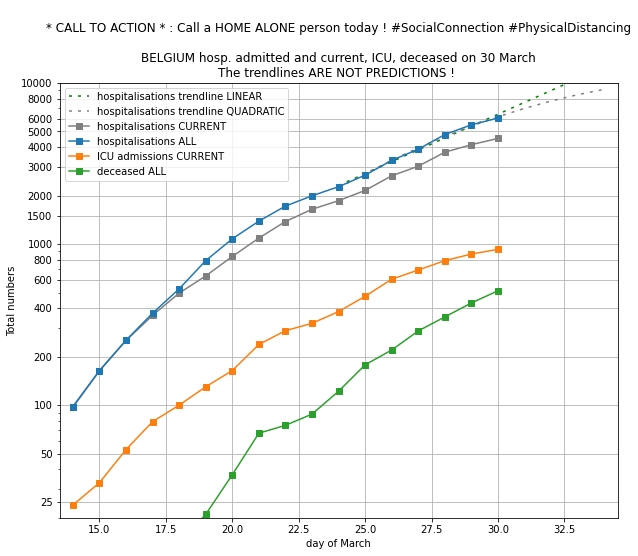

In [0]:
# BELGIUM 30 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836, 1063, 1359, 1527]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042, 3717, 4138, 4524]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878, 4780, 5497, 6051] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690,  789,  867,  927]
deceased =        [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289,  353,  431,  513] 

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ALL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions CURRENT")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased ALL")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"\n* CALL TO ACTION * : Call a HOME ALONE person today ! #SocialConnection #PhysicalDistancing\n\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 4.61
ICU admissions   doubling days = 12.48
Days of March:               [[31], [32], [33], [34]]
Trendline LINEAR numbers:    [4778, 5620, 6610, 7775]
Trendline QUADRATIC numbers: [4589, 5237, 5935, 6682]


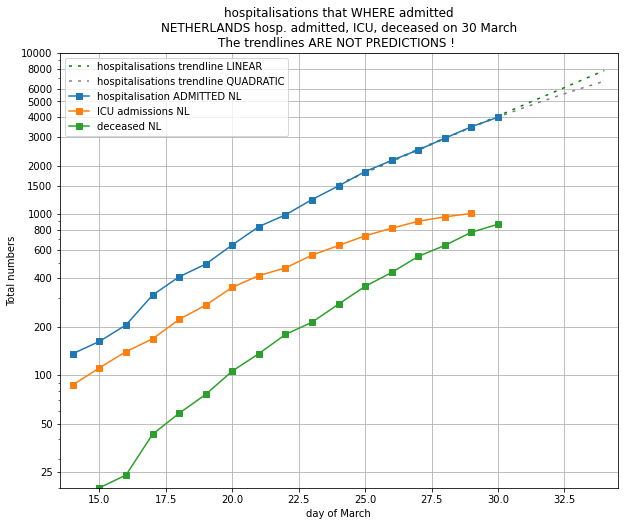

In [0]:
# NETHERLANDS 30 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : https://stichting-nice.nl/

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# keep data from Belgium for comparison (run the cell above again !)
# import copy
# hosp_admitted_BE = copy.deepcopy(hosp_admitted)
# ICU_BE = copy.deepcopy(ICU)
# deceased_BE = copy.deepcopy(deceased)

# Set-up the data
country = "NETHERLANDS"
day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30]
hosp_admitted =   [136, 162, 205, 314, 408, 489,  643,  836,  988, 1230, 1495, 1836, 2151, 2500, 2954, 3483, 3990]
day_of_march_ICU  = day_of_march[:-1]
ICU =             [ 87, 111, 140, 168, 222, 272,  351,  415,  463,  556,  638,  733,  817,  902,  961, 1008]
deceased =        [ 12,  20,  24,  43,  58,  76,  106,  136,  179,  213,  276,  356,  434,  546,  639,  771,  864]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisation ADMITTED NL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions NL")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased NL")

# plt.plot(day_of_march, hosp_admitted_BE, '^-', color = 'C3', label="hospitalisation ADMITTED BE")
# plt.plot(day_of_march, ICU_BE, '^-', color = 'C4', label="ICU admissions BE")
# plt.plot(day_of_march, deceased_BE, '^-', color = 'C5', label="deceased BE")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"hospitalisations that WHERE admitted\n{country} hosp. admitted, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.97
ICU admissions   doubling days = 6.07
Days of March:               [[30], [31], [32], [33]]
Trendline LINEAR numbers:    [6607, 7872, 9379, 11175]
Trendline QUADRATIC numbers: [6767, 8209, 9997, 12223]


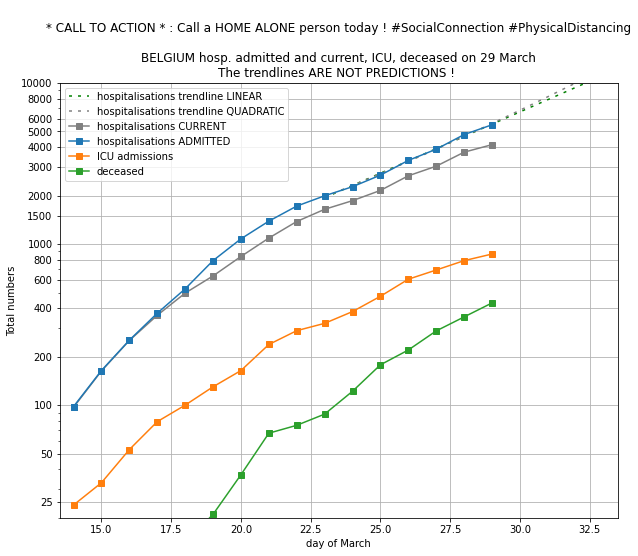

In [0]:
# BELGIUM 29 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836, 1063, 1359]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042, 3717, 4138]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878, 4780, 5497] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690,  789,  867]
deceased =        [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289,  353,  431]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ADMITTED")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"\n* CALL TO ACTION * : Call a HOME ALONE person today ! #SocialConnection #PhysicalDistancing\n\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.76
ICU admissions   doubling days = 5.22
Days of March:               [[29], [30], [31], [32]]
Trendline LINEAR numbers:    [5493, 6514, 7725, 9161]
Trendline QUADRATIC numbers: [5943, 7476, 9529, 12305]


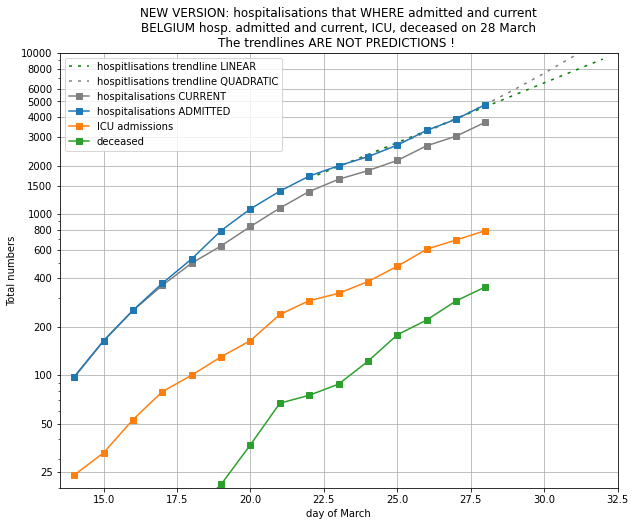

In [0]:
# BELGIUM 28 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836, 1063]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042, 3717]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878, 4780] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690,  789]
deceased =        [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289,  353]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ADMITTED")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"NEW VERSION: hospitalisations that WHERE admitted and current\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 4.37
ICU admissions   doubling days = 8.13
Days of March:               [[29], [30], [31], [32]]
Trendline LINEAR numbers:    [3636, 4358, 5223, 6259]
Trendline QUADRATIC numbers: [3348, 3771, 4189, 4590]


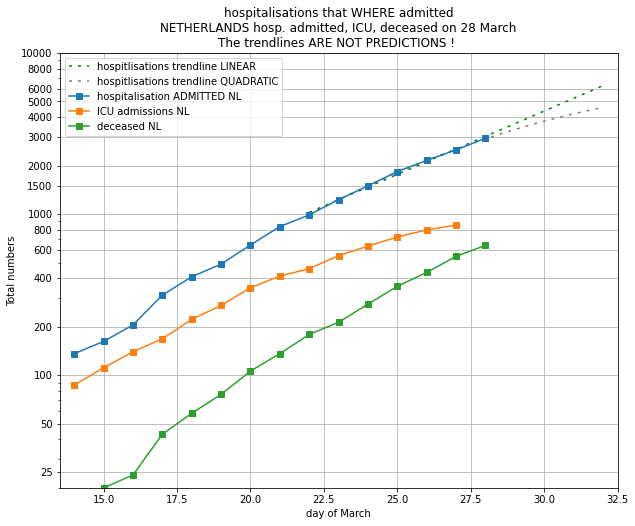

In [0]:
# NETHERLANDS 28 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : https://stichting-nice.nl/

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# keep data from Belgium for comparison (run the cell above again !)
# import copy
# hosp_admitted_BE = copy.deepcopy(hosp_admitted)
# ICU_BE = copy.deepcopy(ICU)
# deceased_BE = copy.deepcopy(deceased)

# Set-up the data
country = "NETHERLANDS"
day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27,   28]
hosp_admitted =   [136, 162, 205, 314, 408, 489,  643,  836,  988, 1230, 1495, 1836, 2151, 2500, 2954]
day_of_march_ICU  = day_of_march[:-1]
ICU =             [ 87, 111, 140, 168, 222, 271,  349,  412,  458,  551,  632,  721,  797,  855]
deceased =        [ 12,  20,  24,  43,  58,  76,  106,  136,  179,  213,  276,  356,  434,  546,  639]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.xlim(((day_of_march[0] - 0.5), (first_future_day + extrapolation_days - 0.5)))
plt.ylim((20,10000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisation ADMITTED NL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions NL")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased NL")

# plt.plot(day_of_march, hosp_admitted_BE, '^-', color = 'C3', label="hospitalisation ADMITTED BE")
# plt.plot(day_of_march, ICU_BE, '^-', color = 'C4', label="ICU admissions BE")
# plt.plot(day_of_march, deceased_BE, '^-', color = 'C5', label="deceased BE")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"hospitalisations that WHERE admitted\n{country} hosp. admitted, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.74
ICU admissions   doubling days = 3.69
Days of March:               [[28], [29], [30], [31]]
Trendline LINEAR numbers:    [4545, 5374, 6353, 7510]
Trendline QUADRATIC numbers: [4619, 5526, 6629, 7974]


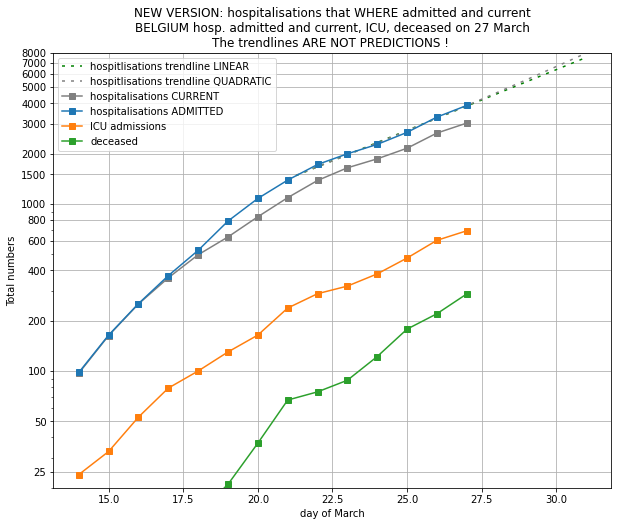

In [0]:
# BELGIUM 27 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26,   27]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653,  836]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652, 3042]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305, 3878] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605,  690]
deceased =        [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220,  289]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,8000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ADMITTED")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"NEW VERSION: hospitalisations that WHERE admitted and current\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.69
ICU admissions   doubling days = 3.00
Days of March:               [[27], [28], [29], [30]]
Trendline LINEAR numbers:    [3934, 4696, 5605, 6691]
Trendline QUADRATIC numbers: [3665, 4149, 4641, 5131]


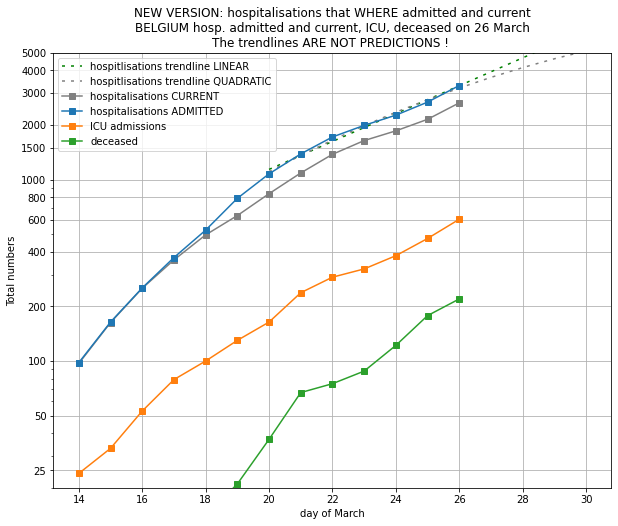

In [0]:
# BELGIUM 26 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525,  653]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152, 2652]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677, 3305] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474,  605]
deceased =        [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178,  220]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ADMITTED")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"NEW VERSION: hospitalisations that WHERE admitted and current\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.81
ICU admissions   doubling days = 10.79
Days of March:               [[27], [28], [29], [30]]
Trendline LINEAR numbers:    [2702, 3302, 4035, 4930]
Trendline QUADRATIC numbers: [2561, 3005, 3495, 4029]


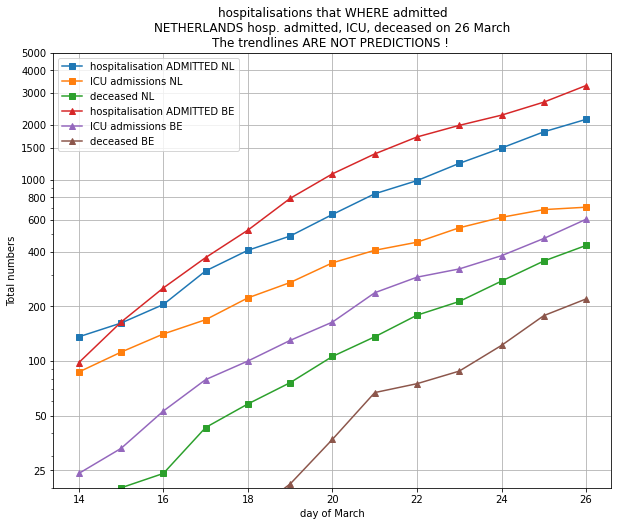

In [0]:
# NETHERLANDS 26 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : NOS drawing
# 21 March : https://www.nu.nl/coronavirus/6036016/flinke-stijging-ziekenhuisopnamen-in-nederland.html
# Correction on 21 March of the number of ICU admissions

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# keep data from Belgium
import copy
hosp_admitted_BE = copy.deepcopy(hosp_admitted)
ICU_BE = copy.deepcopy(ICU)
deceased_BE = copy.deepcopy(deceased)

# Set-up the data
country = "NETHERLANDS"
day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25,   26]
hosp_admitted =   [136, 162, 205, 314, 408, 489,  643,  836,  988, 1230, 1495, 1836, 2151]
day_of_march_ICU  = day_of_march
ICU =             [ 87, 112, 141, 169, 223, 271,  348,  408,  452,  543,  620,  684,  705]
deceased =        [ 12,  20,  24,  43,  58,  76,  106,  136,  179,  213,  276,  356,  434]

# 27 March: hosp 2500 (+349), ICU ??, deceased 546 (+112)
current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

# plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
# plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisation ADMITTED NL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions NL")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased NL")

plt.plot(day_of_march, hosp_admitted_BE, '^-', color = 'C3', label="hospitalisation ADMITTED BE")
plt.plot(day_of_march, ICU_BE, '^-', color = 'C4', label="ICU admissions BE")
plt.plot(day_of_march, deceased_BE, '^-', color = 'C5', label="deceased BE")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"hospitalisations that WHERE admitted\n{country} hosp. admitted, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 4.70
ICU admissions   doubling days = 3.59
Days of March:               [[26], [27], [28], [29]]
Trendline LINEAR numbers:    [3474, 4231, 5153, 6275]
Trendline QUADRATIC numbers: [2811, 2921, 2931, 2838]


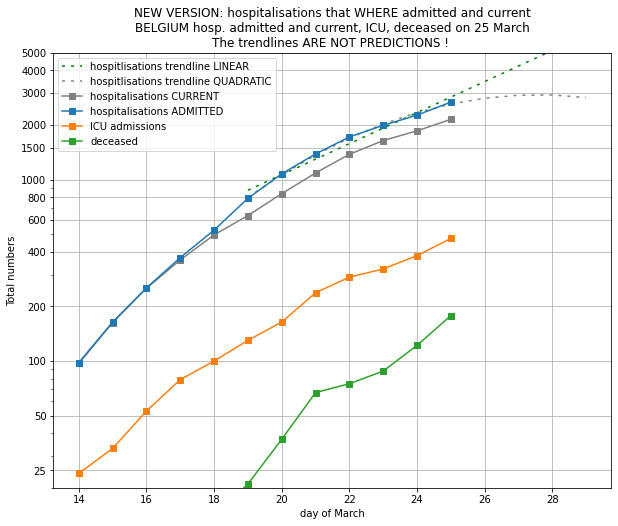

In [0]:
# BELGIUM 25 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

# UPDATE: now plotting hospitalisations as
# * ADMITTED: all patients that WHERE admitted
# * CURRENT: ADMITTED minus DISCHARGED

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"

day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25]
hosp_discharged = [  1,   1,   1,  14,  31, 155,  240,  298,  340,  350,  410,  525]
hosp_current =    [ 97, 163, 252, 361, 496, 634,  837, 1089, 1380, 1643, 1859, 2152]
hosp_admitted =   [ 98, 164, 253, 372, 527, 789, 1077, 1387, 1720, 1993, 2269, 2677] # calculated
day_of_march_ICU  = day_of_march
ICU =             [ 24,  33,  53,  79, 100, 130,  164,  238,  290,  322,  381,  474]
deceased =        [  4,   4,   5,  10,  14,  21,   37,   67,   75,   88,  122,  178]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_current, 's-', color = 'gray', label="hospitalisations CURRENT")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisations ADMITTED")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"NEW VERSION: hospitalisations that WHERE admitted and current\n{country} hosp. admitted and current, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.46
ICU admissions   doubling days = 4.96
Days of March:               [[26], [27], [28], [29]]
Trendline LINEAR numbers:    [2326, 2887, 3582, 4445]
Trendline QUADRATIC numbers: [2143, 2500, 2878, 3267]


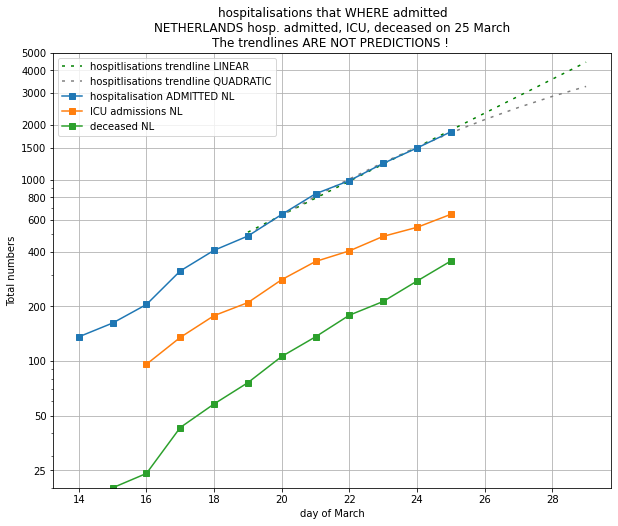

In [0]:
# NETHERLANDS 25 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : NOS drawing
# 21 March : https://www.nu.nl/coronavirus/6036016/flinke-stijging-ziekenhuisopnamen-in-nederland.html
# Correction on 21 March of the number of ICU admissions

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# keep data from Belgium
# import copy
# hosp_admitted_BE = copy.deepcopy(hosp_admitted)
# ICU_BE = copy.deepcopy(ICU)
# deceased_BE = copy.deepcopy(deceased)

# Set-up the data
country = "NETHERLANDS"
day_of_march  =   [ 14,  15,  16,  17,  18,  19,   20,   21,   22,   23,   24,   25]
hosp_admitted =   [136, 162, 205, 314, 408, 489,  643,  836,  988, 1230, 1495, 1836]
day_of_march_ICU  =          [16,  17,  18,  19,   20,   21,   22,   23,   24,   25]
ICU =                        [96, 135, 178, 210,  281,  354,  405,  487,  546,  644]
deceased =        [ 12,  20,  24,  43,  58,  76,  106,  136,  179,  213,  276,  356]

current_day = day_of_march[-1]

log2_hosp = [log(x, 2) for x in hosp_admitted]
log2_ICU =  [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp_admitted, 's-', color = 'C0', label="hospitalisation ADMITTED NL")
plt.plot(day_of_march_ICU, ICU, 's-', color = 'C1', label="ICU admissions NL")
plt.plot(day_of_march, deceased, 's-', color = 'C2', label="deceased NL")

# plt.plot(day_of_march, hosp_admitted_BE, 's-', color = 'C3', label="hospitalisation ADMITTED BE")
# plt.plot(day_of_march, ICU_BE, 's-', color = 'C4', label="ICU admissions BE")
# plt.plot(day_of_march, deceased_BE, 's-', color = 'C5', label="deceased BE")


plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"hospitalisations that WHERE admitted\n{country} hosp. admitted, ICU, deceased on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 4.65
ICU admissions   doubling days = 5.08
Days of March:               [[25], [26], [27], [28]]
Trendline LINEAR numbers:    [2551, 3203, 4021, 5048]
Trendline QUADRATIC numbers: [2156, 2385, 2566, 2684]


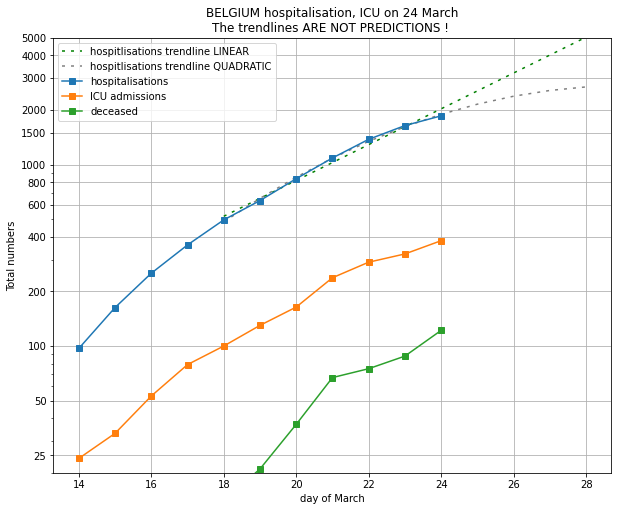

In [0]:
S# BELGIUM 24 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
day_of_march_ICU  = day_of_march
current_day = day_of_march[-1]

hosp = [97, 163, 252, 361, 496, 634, 837, 1089, 1380, 1643, 1859]
ICU = [24, 33, 53, 79, 100, 130, 164, 238, 290, 322, 381]
deceased = [4, 4, 5, 10, 14, 21, 37, 67, 75, 88, 122]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU admissions")
plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.37
ICU admissions   doubling days = 4.59
Days of March:               [[24], [25], [26], [27]]
Trendline LINEAR numbers:    [2252, 2905, 3749, 4837]
Trendline QUADRATIC numbers: [2012, 2385, 2776, 3170]


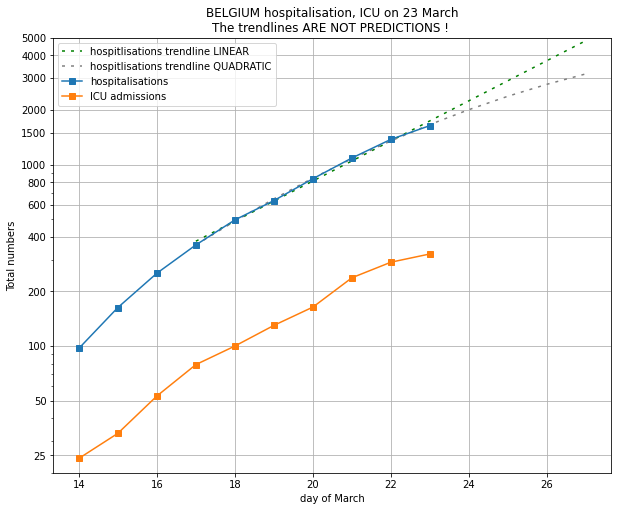

In [0]:
# BELGIUM 23 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
day_of_march_ICU  = day_of_march
current_day = day_of_march[-1]

hosp = [97, 163, 252, 361, 496, 634, 837, 1089, 1380, 1643]
ICU = [24, 33, 53, 79, 100, 130, 164, 238, 290, 322]
deceased = [4, 4, 5, 10, 14, 21, 37, 67, 75, 88]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospialisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU admissions")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 2.77
ICU admissions   doubling days = 2.43
Days of March:               [[23], [24], [25], [26]]
Trendline LINEAR numbers:    [1904, 2518, 3331, 4407]
Trendline QUADRATIC numbers: [1693, 2051, 2436, 2838]


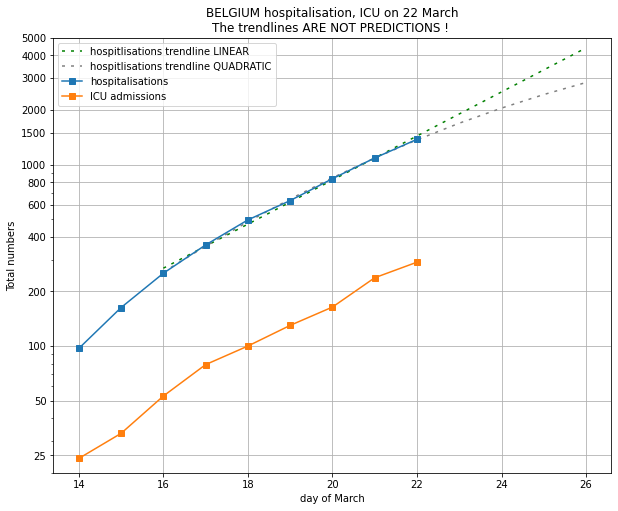

In [0]:
# BELGIUM 22 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21, 22]
day_of_march_ICU  = day_of_march
current_day = day_of_march[-1]

hosp = [97, 163, 252, 361, 496, 634, 837, 1089, 1380]
ICU = [24, 33, 53, 79, 100, 130, 164, 238, 290]
deceased = [4, 4, 5, 10, 14, 21, 37, 67, 75]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU admissions")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Hospitalisations doubling days = 3.23
ICU admissions   doubling days = 2.65 (OLD data, 21 March)
Days of March:               [[23], [24], [25], [26]]
Trendline LINEAR numbers:    [1358, 1752, 2260, 2916]
Trendline QUADRATIC numbers: [1159, 1328, 1482, 1610]


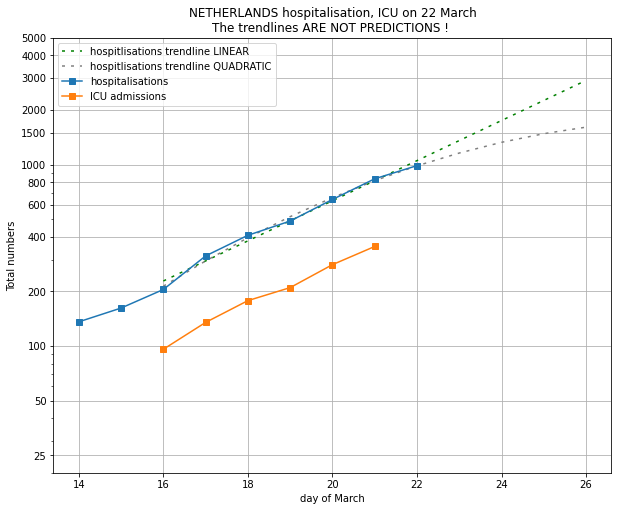

In [0]:
# NETHERLANDS 22 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : NOS drawing
# 21 March : https://www.nu.nl/coronavirus/6036016/flinke-stijging-ziekenhuisopnamen-in-nederland.html
# Correction on 21 March of the number of ICU admissions

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "NETHERLANDS"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21, 22]
day_of_march_ICU  = [16, 17, 18, 19, 20, 21]
current_day = day_of_march[-1]

hosp = [136, 162, 205, 314, 408, 489, 643, 836, 988]
ICU = [96, 135, 178, 210, 281, 354] # no data for 22 March
deceased = [12, 20, 24, 43, 58, 76, 106, 136, 179]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 days (to average out daily noise)
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-3]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-3]
print("Hospitalisations doubling days = %.2f" % (2/last_log2_diff_hosp))
print("ICU admissions   doubling days = %.2f (OLD data, 21 March)" % (2/last_log2_diff_ICU))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")
plt.ylim((20,5000))
values = [25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 5000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU admissions")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU on {current_day} March\nThe trendlines ARE NOT PREDICTIONS ! ")
plt.legend()
plt.grid()
plt.show()

Average doubling days = 2.18
Days of March:               [[22], [23], [24], [25]]
Trendline LINEAR numbers:    [1579, 2152, 2932, 3996]
Trendline QUADRATIC numbers: [1290, 1511, 1710, 1872]


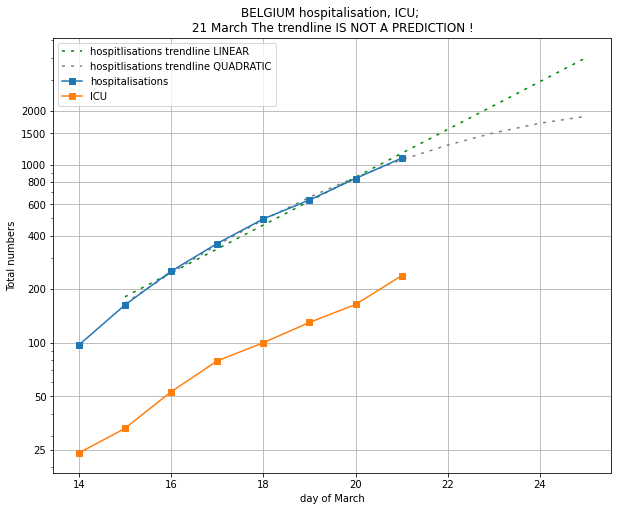

In [0]:
# BELGIUM 21 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21]
day_of_march_ICU  = day_of_march

hosp = [97, 163, 252, 361, 496, 634, 837, 1089]
ICU = [24, 33, 53, 79, 100, 130, 164, 238]
deceased = [4, 4, 5, 10, 14, 21, 37, 67]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 data points
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
average_last_log2_diff = (last_log2_diff_hosp + last_log2_diff_ICU)/2
print("Average doubling days = %.2f" % (1/average_last_log2_diff))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = day_of_march[-1] + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU; \n 21 March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.grid()
plt.show()

Average doubling days = 2.81
Days of March:               [[22], [23], [24], [25]]
Trendline LINEAR numbers:    [1130, 1485, 1952, 2565]
Trendline QUADRATIC numbers: [1009, 1219, 1445, 1681]


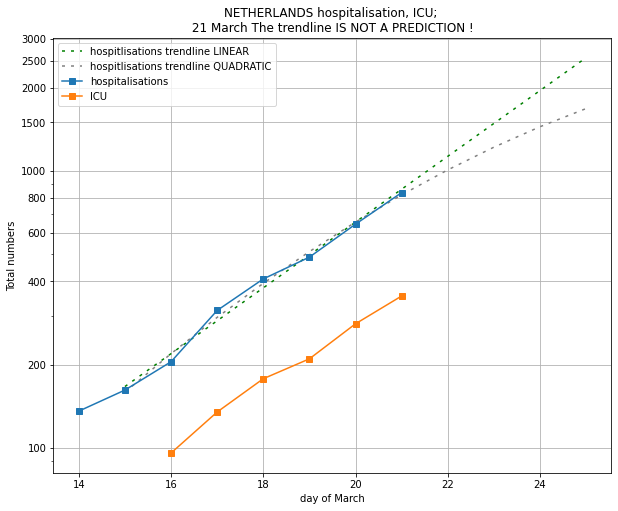

In [0]:
# WORK IN PROCESS NETHERLANDS 21 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : NOS drawing
# 21 March : https://www.nu.nl/coronavirus/6036016/flinke-stijging-ziekenhuisopnamen-in-nederland.html
# Correction on 21 March of the number of ICU admissions

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "NETHERLANDS"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21]
day_of_march_ICU  = [16, 17, 18, 19, 20, 21]
current_day = day_of_march[-1]

hosp = [136, 162, 205, 314, 408, 489, 643, 836]
ICU = [96, 135, 178, 210, 281, 354]
deceased = [12, 20, 24, 43, 58, 76, 106, 136]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 data points
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
average_last_log2_diff = (last_log2_diff_hosp + last_log2_diff_ICU)/2
print("Average doubling days = %.2f" % (1/average_last_log2_diff))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU; \n {current_day} March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.grid()
plt.show()

Average doubling days = 3.19
Days of March:               [[23], [24], [25], [26]]
Trendline LINEAR numbers:    [1904, 2518, 3331, 4407]
Trendline QUADRATIC numbers: [1693, 2051, 2436, 2838]


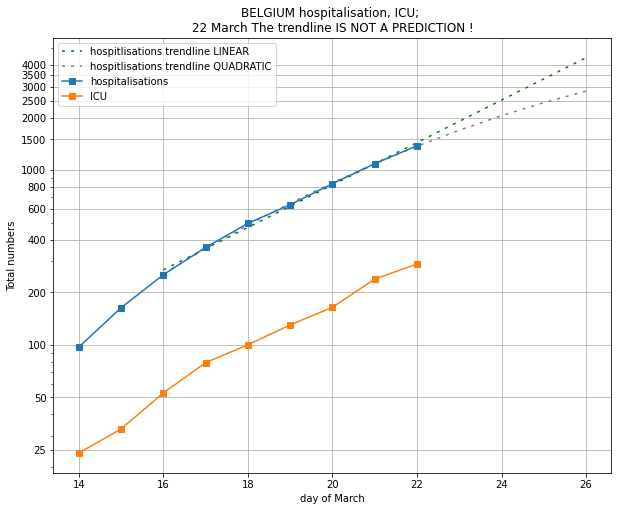

In [0]:
# BELGIUM 22 March 2020
# LINEAR + QUADRATIC trend line
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd

# Set-up the data
country = "BELGIUM"
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21, 22]
day_of_march_ICU  = day_of_march
current_day = day_of_march[-1]

hosp = [97, 163, 252, 361, 496, 634, 837, 1089, 1380]
ICU = [24, 33, 53, 79, 100, 130, 164, 238, 290]
deceased = [4, 4, 5, 10, 14, 21, 37, 67, 75]

log2_hosp = [log(x, 2) for x in hosp]
log2_ICU = [log(x, 2) for x in ICU]
log2_deceased = [log(x, 2) for x in deceased]

# Average "doubling" time over last 2 data points
last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
average_last_log2_diff = (last_log2_diff_hosp + last_log2_diff_ICU)/2
print("Average doubling days = %.2f" % (1/average_last_log2_diff))


# Fitting Polynomial Regression to the dataset
# ONLY USING THE LAST WEEK (LAST 7 days)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

extrapolation_days = 4 # how many extrapolate in future
previous_days = 7 # how many days regression in past

X = [[x] for x in day_of_march[-previous_days:]]
first_future_day = current_day + 1
trendline_dates = [[x] for x in range(first_future_day, first_future_day + extrapolation_days)]
X_ = X + trendline_dates
y = log2_hosp[-previous_days:]
print(f"Days of March:               {trendline_dates}")

# linear (degree 1)
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X)

poly_1.fit(X_poly_1, y)
lin2_1 = LinearRegression()
lin2_1.fit(X_poly_1, y)

trend_1 = [pow(2, x) for x in lin2_1.predict(poly_1.fit_transform(X_))]

log2_hosp_trend_1 = lin2_1.predict(poly_1.fit_transform(trendline_dates))
print(f"Trendline LINEAR numbers:    {[int(pow(2, x)) for x in log2_hosp_trend_1]}")

# quadratic (degree 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)

poly_2.fit(X_poly_2, y)
lin2_2 = LinearRegression()
lin2_2.fit(X_poly_2, y)

trend_2 = [pow(2, x) for x in lin2_2.predict(poly_2.fit_transform(X_))]

log2_hosp_trend_2 = lin2_2.predict(poly_2.fit_transform(trendline_dates))
print(f"Trendline QUADRATIC numbers: {[int(pow(2, x)) for x in log2_hosp_trend_2]}")


# Prepare the plot
figure(num=1, figsize=(10, 8))
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.yticks(values, ['%d' % val for val in values])

plt.plot(X_, trend_1, color = 'green', dashes=[2, 4], label="hospitalisations trendline LINEAR")
plt.plot(X_, trend_2, color = 'gray', dashes=[2, 4], label="hospitalisations trendline QUADRATIC")
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title(f"{country} hospitalisation, ICU; \n {current_day} March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.grid()
plt.show()

Average doubling days = 2.18
Days of March:     [[21], [22], [23], [24], [25]]
Trendline numbers:  [1050, 1236, 1394, 1505, 1557]


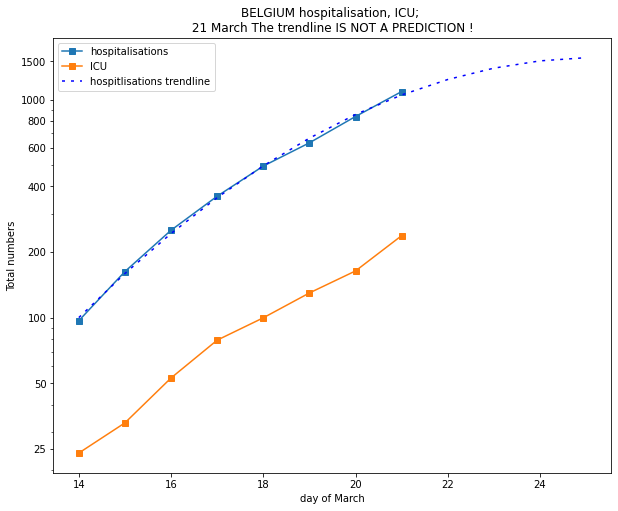

In [0]:
# BELGIUM 21 March 2020
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd
 
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21]
day_of_march_future = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

hosp = [97, 163, 252, 361, 496, 634, 837, 1089]
ICU = [24, 33, 53, 79, 100, 130, 164, 238]
deceased = [4, 4, 5, 10, 14, 21, 37, 67]

log2_hosp = [log(x, 2) for x in hosp if x]
log2_ICU = [log(x, 2) for x in ICU if x]
log2_deceased = [log(x, 2) for x in deceased if x]

last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
average_last_log2_diff = (last_log2_diff_hosp + last_log2_diff_ICU)/2
print("Average doubling days = %.2f" % (1/average_last_log2_diff))

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

X = [[x] for x in day_of_march]
X_ = [[x] for x in day_of_march_future]
y = log2_hosp

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

figure(num=1, figsize=(10, 8)) 
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000]
plt.yticks(values, ['%d' % val for val in values])
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march, ICU, 's-', label="ICU")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

trend = [pow(2, x) for x in lin2.predict(poly.fit_transform(X_))]

plt.plot(X_, trend, color = 'blue', dashes=[2, 4], label="hospitalisations trendline")

trendline_dates = [[21],[22],[23],[24],[25]]
#trendline_dates = X_ # use this to see all trendline values, also in the past


log2_hosp_near_max = lin2.predict(poly.fit_transform(trendline_dates))
print(f"Days of March:     {trendline_dates}")
print(f"Trendline numbers:  {[int(pow(2, x)) for x in log2_hosp_near_max]}")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title("BELGIUM hospitalisation, ICU; \n 21 March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.show()

Average doubling days = 2.81
Days of March:     [[21], [22], [23]]
Trendline numbers:  [839, 1080, 1386]


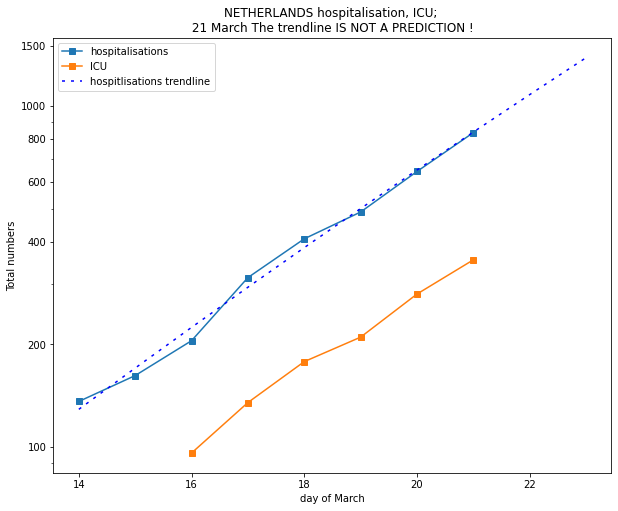

In [0]:
# NETHERLANDS 21 March 2020
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU : NOS drawing
# 21 March : https://www.nu.nl/coronavirus/6036016/flinke-stijging-ziekenhuisopnamen-in-nederland.html
# Correction on 21 March of the number of ICU admissions

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd
 
day_of_march  = [14, 15, 16, 17, 18, 19, 20, 21]
day_of_march_ICU  = [16, 17, 18, 19, 20, 21]
day_of_march_future = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

hosp = [136, 162, 205, 314, 408, 489, 643, 836]
ICU = [96, 135, 178, 210, 281, 354]
deceased = [12, 20, 24, 43, 58, 76, 106, 136]

log2_hosp = [log(x, 2) for x in hosp if x]
log2_ICU = [log(x, 2) for x in ICU if x]
log2_deceased = [log(x, 2) for x in deceased if x]

last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
average_last_log2_diff = (last_log2_diff_hosp+last_log2_diff_ICU)/2
print("Average doubling days = %.2f" % (1/average_last_log2_diff))

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

X = [[x] for x in day_of_march]
X_ = [[x] for x in day_of_march_future]
y = log2_hosp

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

figure(num=1, figsize=(10, 8)) 
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000]
plt.yticks(values, ['%d' % val for val in values])
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

trend = [pow(2, x) for x in lin2.predict(poly.fit_transform(X_))]

plt.plot(X_, trend, color = 'blue', dashes=[2, 4], label="hospitalisations trendline")

# trendline_dates = X_ # use this to see all trendline values, also in the past
trendline_dates = [[21],[22],[23]]

log2_hosp_near_max = lin2.predict(poly.fit_transform(trendline_dates))
print(f"Days of March:     {trendline_dates}")
print(f"Trendline numbers:  {[int(pow(2, x)) for x in log2_hosp_near_max]}")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title("NETHERLANDS hospitalisation, ICU; \n 21 March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.show()

Average doubling days = 2.70
Days of March:     [[20], [21], [22], [23], [24], [25], [26]]
Trendline numbers:  [816, 963, 1077, 1142, 1148, 1094, 989]


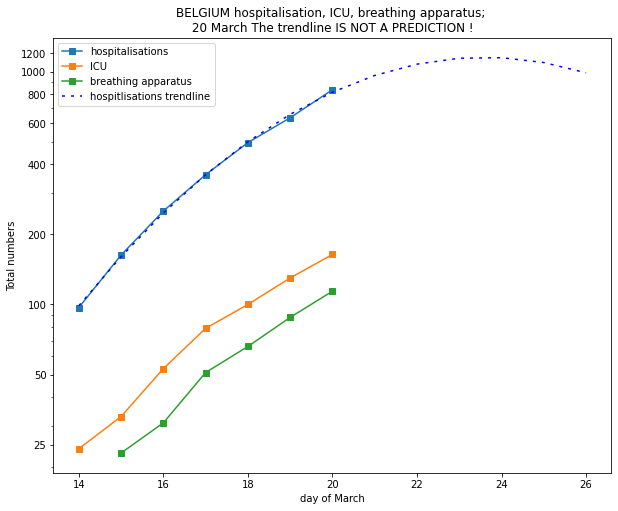

In [0]:
# BELGIUM 20 March 2020
# Copyright Peter Vandenabeele and Kris Peeters
# Licensed under BSD license (see below)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd
 
day_of_march  = [14, 15, 16, 17, 18, 19, 20]
day_of_march_from_15 = [15, 16, 17, 18, 19, 20]
day_of_march_future = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

hosp = [97, 163, 252, 361, 496, 634, 837]
ICU = [24, 33, 53, 79, 100, 130, 164]
breathing = [23, 31, 51, 66, 88, 114]
deceased = [4, 4, 5, 10, 14, 21, 37]

log2_hosp = [log(x, 2) for x in hosp if x]
log2_ICU = [log(x, 2) for x in ICU if x]
log2_breathing = [log(x, 2) for x in breathing if x]
log2_deceased = [log(x, 2) for x in deceased if x]

last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
last_log2_diff_breathing = log2_breathing[-1] - log2_breathing[-2]
average_last_log2_diff = (last_log2_diff_hosp + last_log2_diff_ICU + last_log2_diff_breathing)/3
print("Average doubling days = %.2f" % (1/average_last_log2_diff))

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

X = [[x] for x in day_of_march]
X_ = [[x] for x in day_of_march_future]
y = log2_hosp

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

figure(num=1, figsize=(10, 8)) 
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1200]
plt.yticks(values, ['%d' % val for val in values])
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march, ICU, 's-', label="ICU")
plt.plot(day_of_march_from_15, breathing, 's-', label="breathing apparatus")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

trend = [pow(2, x) for x in lin2.predict(poly.fit_transform(X_))]

plt.plot(X_, trend, color = 'blue', dashes=[2, 4], label="hospitalisations trendline")

# trendline_dates = X_ # use this to see all trendline values, also in the past
trendline_dates = [[20],[21],[22],[23],[24],[25],[26]]

log2_hosp_near_max = lin2.predict(poly.fit_transform(trendline_dates))
print(f"Days of March:     {trendline_dates}")
print(f"Trendline numbers:  {[int(pow(2, x)) for x in log2_hosp_near_max]}")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title("BELGIUM hospitalisation, ICU, breathing apparatus; \n 20 March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.show()

Average doubling days = 2.45
Days of March:     [[20], [21], [22], [23], [24]]
Trendline numbers:  [652, 847, 1097, 1417, 1826]


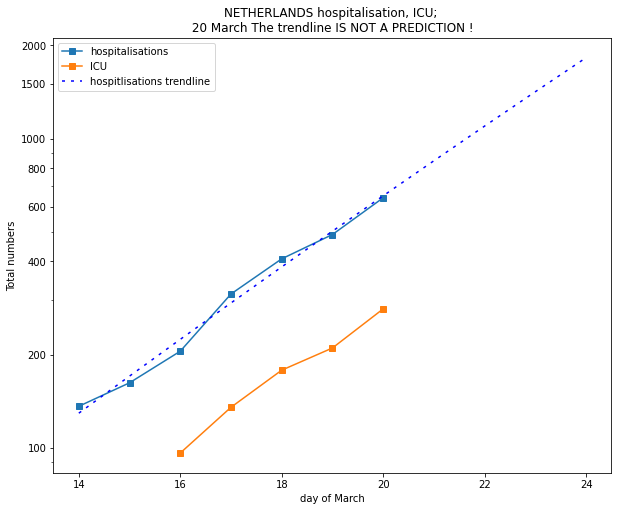

In [0]:
# Netherlands
# Sources:
# https://www.rivm.nl/nieuws/actuele-informatie-over-coronavirus
# ICU
# NOS drawing 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, exp, pow
import numpy as np
import pandas as pd
 
day_of_march  = [14, 15, 16, 17, 18, 19, 20]
day_of_march_ICU  = [16, 17, 18, 19, 20]
day_of_march_future = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

hosp = [136, 162, 205, 314, 408, 489, 643]
ICU = [96, 135, 178, 210, 281]
deceased = [12, 20, 24, 43, 58, 76, 106]

log2_hosp = [log(x, 2) for x in hosp if x]
log2_ICU = [log(x, 2) for x in ICU if x]
log2_deceased = [log(x, 2) for x in deceased if x]

last_log2_diff_hosp = log2_hosp[-1] - log2_hosp[-2]
last_log2_diff_ICU = log2_ICU[-1] - log2_ICU[-2]
average_last_log2_diff = (last_log2_diff_hosp+last_log2_diff_ICU)/2
print("Average doubling days = %.2f" % (1/average_last_log2_diff))

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

X = [[x] for x in day_of_march]
X_ = [[x] for x in day_of_march_future]
y = log2_hosp

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

figure(num=1, figsize=(10, 8)) 
plt.yscale("log")

values = [10, 25, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000]
plt.yticks(values, ['%d' % val for val in values])
plt.plot(day_of_march, hosp, 's-', label="hospitalisations")
plt.plot(day_of_march_ICU, ICU, 's-', label="ICU")
#plt.plot(day_of_march, deceased, 's-', label="deceased")

trend = [pow(2, x) for x in lin2.predict(poly.fit_transform(X_))]

plt.plot(X_, trend, color = 'blue', dashes=[2, 4], label="hospitalisations trendline")

# trendline_dates = X_ # use this to see all trendline values, also in the past
trendline_dates = [[20],[21],[22],[23],[24]]

log2_hosp_near_max = lin2.predict(poly.fit_transform(trendline_dates))
print(f"Days of March:     {trendline_dates}")
print(f"Trendline numbers:  {[int(pow(2, x)) for x in log2_hosp_near_max]}")

plt.xlabel("day of March")
plt.ylabel("Total numbers")
plt.title("NETHERLANDS hospitalisation, ICU; \n 20 March The trendline IS NOT A PREDICTION ! ")
plt.legend()
plt.show()

In [0]:
Copyright (c) 2020 Peter Vandenabeele and Kris Peeters.
All rights reserved.

Redistribution and use in source and binary forms are permitted
provided that the above copyright notice and this paragraph are
duplicated in all such forms and that any documentation,
advertising materials, and other materials related to such
distribution and use acknowledge that the software was developed
by the authors. The name of the
authors may not be used to endorse or promote products derived
from this software without specific prior written permission.
THIS SOFTWARE IS PROVIDED ``AS IS'' AND WITHOUT ANY EXPRESS OR
IMPLIED WARRANTIES, INCLUDING, WITHOUT LIMITATION, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

"\nCopyright (c) 2020 Peter Vandenabeele and Kris Peeters.\nAll rights reserved.\n\nRedistribution and use in source and binary forms are permitted\nprovided that the above copyright notice and this paragraph are\nduplicated in all such forms and that any documentation,\nadvertising materials, and other materials related to such\ndistribution and use acknowledge that the software was developed\nby the authors. The name of the\nauthors may not be used to endorse or promote products derived\nfrom this software without specific prior written permission.\nTHIS SOFTWARE IS PROVIDED ``AS IS'' AND WITHOUT ANY EXPRESS OR\nIMPLIED WARRANTIES, INCLUDING, WITHOUT LIMITATION, THE IMPLIED\nWARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.\n"